In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Análisis de Datos de Covid

En la siguiente dirección  pueden descargarse los datos de casos de Covid-19 desde el 22/1/2020 hasta el día de la fecha, registrados por la Johns Hopkins University:  https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv

Cargamos los datos y los mostramos:

In [ ]:
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
df = pd.read_csv(url) 
display(df)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,10/7/21,10/8/21,10/9/21,10/10/21,10/11/21,10/12/21,10/13/21,10/14/21,10/15/21,10/16/21,10/17/21,10/18/21,10/19/21,10/20/21,10/21/21,10/22/21,10/23/21,10/24/21,10/25/21,10/26/21,10/27/21,10/28/21,10/29/21,10/30/21,10/31/21,11/1/21,11/2/21,11/3/21,11/4/21,11/5/21,11/6/21,11/7/21,11/8/21,11/9/21,11/10/21,11/11/21,11/12/21,11/13/21,11/14/21,11/15/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,...,155429,155448,155466,155508,155540,155599,155627,155682,155688,155739,155764,155776,155801,155859,155891,155931,155940,155944,156040,156071,156124,156166,156196,156210,156250,156284,156307,156323,156363,156392,156397,156397,156397,156397,156414,156456,156487,156510,156552,156610
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,173723,174168,174643,174968,175163,175664,176172,176667,177108,177536,177971,178188,178804,179463,180029,180623,181252,181696,181960,182610,183282,183873,184340,184887,185300,185497,186222,186793,187363,187994,187994,189125,189355,190125,190815,191440,192013,192600,193075,193269
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,204276,204388,204490,204597,204695,204790,204900,205005,205106,205199,205286,205364,205453,205529,205599,205683,205750,205822,205903,205990,206069,206160,206270,206358,206452,206566,206649,206754,206878,206995,207079,207156,207254,207385,207509,207624,207764,207873,207970,208104
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15288,15291,15291,15291,15307,15307,15314,15326,15338,15338,15338,15367,15369,15382,15382,15404,15404,15404,15425,15425,15462,15505,15516,15516,15516,15516,15516,15572,15618,15618,15618,15618,15705,15717,15744,15744,15819,15819,15819,15907
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,60803,61023,61245,61378,61580,61794,62143,62385,62606,62789,62842,63012,63197,63340,63567,63691,63775,63861,63930,64033,64126,64226,64301,64374,64433,64458,64487,64533,64583,64612,64654,64674,64724,64762,64815,64857,64875,64899,64913,64913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,NaN,Vietnam,14.058324,108.277199,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,10,13,13,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,826837,831643,836134,839662,843281,846230,849691,853842,857639,860860,864053,867221,870255,873901,877537,881522,884895,888940,892579,896174,900585,905477,910376,915603,921122,926720,932357,939463,946043,953547,961038,968684,976672,984805,992735,1000897,1009879,1018346,1026522,1035138
276,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,440936,441882,441882,441882,443766,444729,445538,446294,447032,447032,447032,448322,449031,449705,449980,450310,450310,450310,451459,451897,452272,452642,452997,452997,452997,453782,454172,454509,454799,455099,455099,455099,455689,455949,456186,456407,456632,456632,456632,457154
277,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,9299,9333,9345,9369,9402,9412,9439,9467,9495,9512,9526,9556,9575,9596,9635,9650,9662,9678,9694,9711,9728,9751,9773,9779,9791,9799,9806,9810,9831,9843,9858,9870,9883,9891,9902,9907,9912,9918,9918,99

Los datos pueden filtrarse según diversos criterios. Por ejemplo, si queremos seleccionar los datos del Reino Unido, nos interesa filtrar según la columna "Contry/Region". Esto puede hacerse del siguiente modo:

In [ ]:
# Este código se muestra completo. 
filtro_fr = df["Country/Region"]=="France"
francia = df[filtro_fr]
display(francia)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,10/7/21,10/8/21,10/9/21,10/10/21,10/11/21,10/12/21,10/13/21,10/14/21,10/15/21,10/16/21,10/17/21,10/18/21,10/19/21,10/20/21,10/21/21,10/22/21,10/23/21,10/24/21,10/25/21,10/26/21,10/27/21,10/28/21,10/29/21,10/30/21,10/31/21,11/1/21,11/2/21,11/3/21,11/4/21,11/5/21,11/6/21,11/7/21,11/8/21,11/9/21,11/10/21,11/11/21,11/12/21,11/13/21,11/14/21,11/15/21
119,French Guiana,France,3.933900,-53.125800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,41956,42157,42157,42157,42157,42157,42794,42962,43255,43255,43255,43255,43561,43690,43690,43938,43938,43938,43938,44225,44347,44438,44554,44554,44554,44629,44629,44784,44784,44964,44964,44964,45028,45143,45245,45306,45306,45306,45306,45366
120,French Polynesia,France,-17.679700,149.406800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,45181,45359,45359,45359,45359,45359,45359,45439,45439,45439,45439,45439,45439,45439,45506,45515,45515,45515,45506,45506,45506,45541,45541,45541,45541,45541,45541,45541,45541,45573,45573,45573,45573,45573,45573,45573,45573,45573,45573,45573
121,Guadeloupe,France,16.265000,-61.551000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,53544,53544,53544,53544,53544,53544,53836,53836,53836,53836,53836,53836,54095,54095,54095,54095,54095,54095,54095,54288,54288,54288,54288,54288,54288,54288,54288,54288,54474,54474,54474,54474,54474,54672,54672,54672,54672,54672,54672,54854
122,Martinique,France,14.641500,-61.024200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,41749,41846,41846,41846,41846,41846,42183,42269,42269,42269,42269,42269,42543,42634,42748,42820,42820,42820,42820,42903,43022,43022,43183,43183,43183,43347,43347,43347,43347,43347,43347,43347,43665,43789,43789,43881,43962,43962,43962,43962
123,Mayotte,France,-12.827500,45.166244,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,20373,20385,20385,20385,20385,20397,20422,20422,20439,20439,20439,20439,20439,20464,20464,20485,20485,20485,20497,20497,20497,20497,20555,20555,20555,20555,20587,20612,20612,20651,20651,20651,20709,20709,20751,20751,20769,20769,20769,20790
124,New Caledonia,France,-20.904305,165.618042,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,8860,9011,9100,9166,9186,9417,9665,9767,9861,9933,9977,10070,10163,10213,10305,10388,10454,10482,10553,10687,10768,10848,10909,10948,10968,10985,11052,11129,11182,11235,11294,11306,11350,11404,11466,11506,11533,11563,11573,11620
125,Reunion,France,-21.115100,55.536400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,53963,53963,53963,53963,53963,54024,54024,54024,54024,54024,54024,54024,54024,54024,54024,54438,54438,54438,54438,54438,54668,54668,54668,54668,54668,54668,54668,54668,55125,55125,55125,55125,55125,55125,55865,55865,55865,55865,55865,55865
126,Saint Barthelemy,France,17.900000,-62.833300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1649,1649,1649,1649,1649,1649,1658,1658,1658,1658,1658,1658,1659,1659,1659,1659,1659,1659,1659,1659,1659,1659,1659,1659,1659,1659,1659,1659,1660,1660,1660,1660,1660,1661,1661,1661,1661,1661,1661,1661
127,Saint Pierre and Miquelon,France,46.885200,-56.315900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,33
128,St Martin,France,18.070800,-63.050100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3819,3819,3819,3819,3819,3819,3878,3878,3878,3878,3878,3878,3888,3888,3888,3888,3888,3888,3888,3920,3920,3920,3920,3920,392

Como puede verse, los datos de un mismo "país" pueden estar separados por regiones o provincias. En el caso de Francia se computan todos los territorios coloniales con su nombre en la columna "Province/State" y Francia propiamente dicha sin nombre de provincia ("NaN"). 

1. Extraer por separado los datos de Argentina y de Australia.

In [ ]:
# Completar para Argentina
filtro_arg = df["Country/Region"]=="Argentina"
arg        = df[filtro_arg]
display(arg)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,10/7/21,10/8/21,10/9/21,10/10/21,10/11/21,10/12/21,10/13/21,10/14/21,10/15/21,10/16/21,10/17/21,10/18/21,10/19/21,10/20/21,10/21/21,10/22/21,10/23/21,10/24/21,10/25/21,10/26/21,10/27/21,10/28/21,10/29/21,10/30/21,10/31/21,11/1/21,11/2/21,11/3/21,11/4/21,11/5/21,11/6/21,11/7/21,11/8/21,11/9/21,11/10/21,11/11/21,11/12/21,11/13/21,11/14/21,11/15/21
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5264305,5265058,5265528,5265859,5266275,5267339,5268653,5270003,5271361,5272151,5272551,5273463,5274766,5275984,5277525,5278910,5279818,5280358,5281585,5283000,5284485,5286074,5287447,5288259,5288807,5289945,5291285,5292549,5293989,5295260,5296188,5296781,5298069,5299418,5300985,5302445,5304059,5305151,5305742,5307159


In [ ]:
#Completar para Australia
filtro_aus = df["Country/Region"]=="Australia"
aus      = df[filtro_aus]
display(aus)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,10/7/21,10/8/21,10/9/21,10/10/21,10/11/21,10/12/21,10/13/21,10/14/21,10/15/21,10/16/21,10/17/21,10/18/21,10/19/21,10/20/21,10/21/21,10/22/21,10/23/21,10/24/21,10/25/21,10/26/21,10/27/21,10/28/21,10/29/21,10/30/21,10/31/21,11/1/21,11/2/21,11/3/21,11/4/21,11/5/21,11/6/21,11/7/21,11/8/21,11/9/21,11/10/21,11/11/21,11/12/21,11/13/21,11/14/21,11/15/21
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1271,1296,1326,1358,1386,1437,1483,1518,1538,1571,1588,1612,1636,1664,1677,1701,1710,1719,1731,1741,1749,1759,1768,1775,1780,1788,1803,1816,1822,1840,1853,1866,1884,1893,1902,1917,1928,1943,1953,1965
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,...,67669,68246,68712,69205,69552,69993,70391,70781,71099,71399,71658,71923,72202,72560,72899,73212,73500,73785,74057,74362,74634,74887,75112,75278,75407,75578,75766,76073,76314,76580,76824,76988,77207,77417,77671,77951,78200,78393,78556,78766
10,Northern Territory,Australia,-12.4634,130.8456,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,213,214,214,215,215,216,222,222,224,225,225,225,225,225,225,225,225,225,225,225,225,225,225,225,225,225,225,226,227,228,229,229,230,230,231,231,231,232,231,243
11,Queensland,Australia,-27.4698,153.0251,0,0,0,0,0,0,0,1,3,2,3,2,2,3,3,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,...,2056,2059,2062,2063,2067,2067,2067,2068,2071,2071,2071,2071,2072,2077,2082,2082,2082,2082,2085,2086,2087,2089,2089,2089,2090,2090,2089,2092,2094,2095,2098,2098,2099,2102,2105,2109,2106,2106,2109,2110
12,South Australia,Australia,-34.9285,138.6007,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,...,907,908,909,910,913,914,914,914,914,915,915,915,916,916,917,917,917,918,918,918,918,918,918,918,918,918,918,918,918,918,918,918,918,918,918,918,919,920,920,920
13,Tasmania,Australia,-42.8821,147.3272,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,236,236,236,236,236,236,237,237,237,237,237,237,237,237,237,237,237,237,237,237,237,237,237,237,237,237,237,237,237,237,237,237,237,237,237,237,237,237,238,238
14,Victoria,Australia,-37.8136,144.9631,0,0,0,0,1,1,1,1,2,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,...,49104,51012,52902,54470,55936,57470,59763,61869,63836,65674,67457,69206,70998,73151,75340,76886,78763,80152,81651,83185,84942,86563,87918,88930,90261,91217,92126,93339,94669,95917,97043,98130,99183,100162,101451,102566,103760,104665,105484,106262
15,Western Australia,Australia,-31.9505,115.8605,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1110,1110,1110,1110,1110,1111,1111,1111,1112,1112,1112,1112,1112,1112,1112,1112,1112,1112,1112,1112,1112,1112,1112,1112,1112,1112,1112,1112,1112,1112,1112,1112,1112,1112,1112,1112,1112,1112,1112,1113


2. Pasar los datos de ambos países a arreglos de Numpy y eliminar las primeras entradas (que se corresponden con "Province/State", "Country/Region", "Lat" y "Long"), para quedarnos sólo con los casos.

In [ ]:
# La parte de ARG se muestra.
arg   = arg.iloc[:,4:] #iloc permité extraer slices de data frames, igual que si fuera un arreglo de Numpy. 
ARG   = arg.to_numpy()
print(ARG)
print(ARG.shape)

[[      0       0       0       0       0       0       0       0       0
        0       0       0       0       0       0       0       0       0
        0       0       0       0       0       0       0       0       0
        0       0       0       0       0       0       0       0       0
        0       0       0       0       0       1       1       1       2
        8      12      12      17      19      19      31      34      45
       56      68      79      97     128     158     266     301     387
      387     502     589     690     745     820    1054    1054    1133
     1265    1451    1451    1554    1628    1715    1795    1975    1975
     2142    2208    2277    2443    2571    2669    2758    2839    2941
     3031    3144    3435    3607    3780    3892    4003    4127    4285
     4428    4532    4681    4783    4887    5020    5208    5371    5611
     5776    6034    6278    6563    6879    7134    7479    7805    8068
     8371    8809    9283    9931   10

In [ ]:
#Observar que ARG es una matriz de una sola fila!!! conviene extraer esa fila como un vector:
ARG = ARG[0]
print(ARG)
print(ARG.shape)

[      0       0       0       0       0       0       0       0       0
       0       0       0       0       0       0       0       0       0
       0       0       0       0       0       0       0       0       0
       0       0       0       0       0       0       0       0       0
       0       0       0       0       0       1       1       1       2
       8      12      12      17      19      19      31      34      45
      56      68      79      97     128     158     266     301     387
     387     502     589     690     745     820    1054    1054    1133
    1265    1451    1451    1554    1628    1715    1795    1975    1975
    2142    2208    2277    2443    2571    2669    2758    2839    2941
    3031    3144    3435    3607    3780    3892    4003    4127    4285
    4428    4532    4681    4783    4887    5020    5208    5371    5611
    5776    6034    6278    6563    6879    7134    7479    7805    8068
    8371    8809    9283    9931   10649   11353   

In [ ]:
#Completar para Australia (tener en cuenta que aquí vamos a obtener una matriz con varias filas y las queremos todas)
aus   = aus.iloc[:,4:] 
AUS   = aus.to_numpy()
print(AUS)
print(AUS.shape)


[[     0      0      0 ...   1943   1953   1965]
 [     0      0      0 ...  78393  78556  78766]
 [     0      0      0 ...    232    231    243]
 ...
 [     0      0      0 ...    237    238    238]
 [     0      0      0 ... 104665 105484 106262]
 [     0      0      0 ...   1112   1112   1113]]
(8, 664)


3. Nos interesa estudiar la evaluación de los casos por país, para lo cual  necesitaremos sumar todas las regiones de Australia para obtener un único vector de datos, similar al de Argentina. Esto puede lograrse usando el comando np.sum (investigar cómo). 

In [ ]:
AUS = np.sum(AUS, axis = 0)#
print(AUS) #Para chequear que tenemos un vector con los casos de todo el país.

[     0      0      0      0      4      5      5      6      9      9
     12     12     12     13     13     14     15     15     15     15
     15     15     15     15     15     15     15     15     15     15
     15     15     15     15     15     15     15     15     25     27
     30     39     52     55     60     63     76     91    107    128
    128    200    250    297    377    452    568    681    791   1071
   1549   1682   2044   2364   2810   3143   3640   3984   4361   4559
   4862   5116   5330   5550   5687   5797   5895   6010   6108   6215
   6303   6315   6351   6415   6440   6462   6522   6568   6610   6623
   6645   6652   6662   6677   6694   6714   6721   6744   6752   6766
   6778   6799   6822   6847   6875   6894   6913   6918   6939   6948
   6970   6980   6989   7019   7035   7044   7054   7068   7072   7081
   7095   7099   7114   7114   7126   7139   7150   7165   7184   7192
   7202   7221   7229   7240   7247   7252   7259   7265   7267   7274
   728

Generar un vector $dias$ que contenga los números $0,\dots$ hasta el número de día correspondiente al último dato. Graficar conjuntamente la evolución de casos en Australia y en Argentina en función de $dias$.

In [ ]:
n = len(AUS)
dias = np.arange(n)
dias

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

Text(0, 0.5, 'Casos')

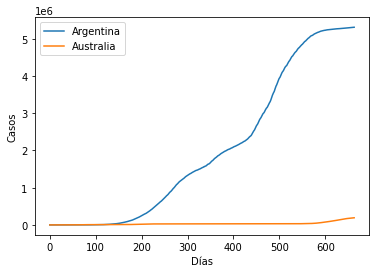

In [ ]:
plt.plot(dias, ARG, label = 'Argentina', )
plt.plot(dias, AUS, label = 'Australia')
plt.legend()
plt.xlabel('Días')
plt.ylabel('Casos')

4.  Nos interesa analizar la cantidad de casos diarios (y no el acumulado). Extraer esta información de cada vector de casos. Para ello, puede utilizarse la función np.diff. Hacer un scatter de los datos. Tener en cuenta que al utilizar el comando np.diff se obtiene un vector con un casillero menos. 

    Hacer (por separado) scatter plots para cada país. 

In [ ]:
diarios_ARG = np.diff(ARG)
diarios_AUS = np.diff(AUS)
dias_diario = np.arange(1,n)
dias_diario.shape


(663,)

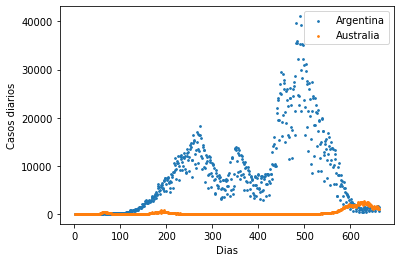

In [ ]:
plt.scatter(dias_diario, diarios_ARG, s = 3, label = 'Argentina')
plt.scatter(dias_diario, diarios_AUS, s = 3, label = 'Australia')
plt.xlabel('Dias')
plt.ylabel('Casos diarios')
plt.legend()

5.  Los datos crudos (en particular en el caso de Argentina) tienen algo de ruido generado en parte por la variabilidad de testeos y registro en los diferentes días de la semana. 

    Teniendo en cuenta que nuestros vectores con casos diarios comienzan a contar el día 23/1/2020 que fue jueves, repetir el scatter plot para Argentina y superponerle el scatter plot que sólo tiene los datos de los domingos.

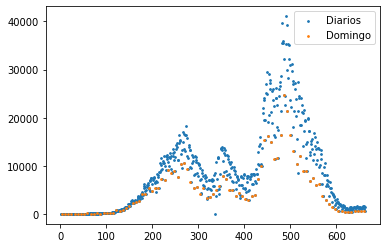

In [ ]:
dom = np.arange(3,n,7)

ARG_dom = [diarios_ARG[i] for i in dom]

plt.scatter(dias_diario, diarios_ARG, s = 3, label = 'Diarios')
plt.scatter(dom, ARG_dom, s = 3, label = 'Domingo')
plt.legend()

95

Repetir el gráfico, pero distinguiendo los días jueves:

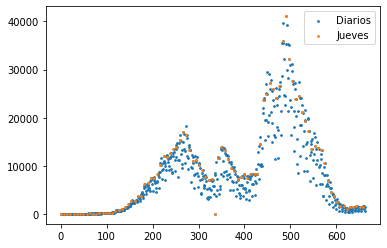

In [ ]:
jueves = np.arange(0,n,7)

ARG_jue = [diarios_ARG[i] for i in jueves]


plt.scatter(dias_diario, diarios_ARG, s = 3, label = 'Diarios')
plt.scatter(jueves, ARG_jue, s = 3, label = 'Jueves')
plt.legend()

Una manera de suavizar los datos es tomar promedios de un cierto período de ventana. Es decir: se considera un período de ventana de $k$ días. El día número $k$ se registra el promedio de los primeros $k$ días, el día $k+1$ el promedio de los días $2$,...,$k+1$, etc. Esto genera un vector de datos con $k$ casilleros menos.
    Implementar una función promedio_ventana que reciba un vector $v$ de longitud $n$ y un número $k$ y devuelva un vector de longitud $n-k$ con con los promedios cada $k$ elementos del vector. Para calcular el promedio puede usarse la función np.mean, aplicada a una sección del vector $v$. 

In [ ]:

def promedio_ventana(v,k):
  ventana = []
  for i in range(len(v)-k):
    valor_promedio = np.mean(v[i:i+k])
    ventana.append(valor_promedio)
  ventana
  return ventana
    

In [ ]:
w = promedio_ventana(diarios_ARG, 3)
len(w)

660

Aplicar la función a los datos de Argentina con ventana de 3,7,10 y 15 días y hacer los scatter plots correspondientes. Observar que efectivamente los datos se suavizan. 

Uno esperaría que los cuantos mayor sea $k$, más suave sea el resultado. Mirar con atención los gráficos. ¿Qué se observa? ¿Alguna idea de por qué?

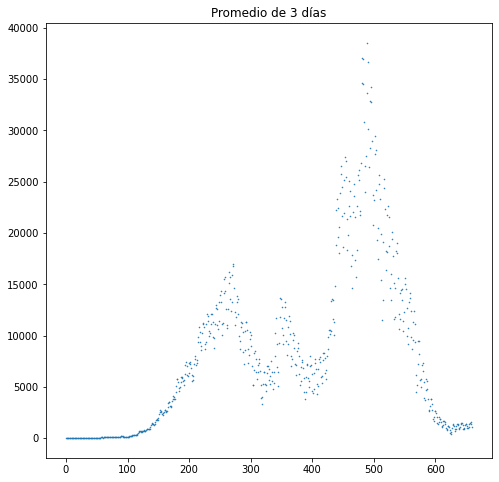

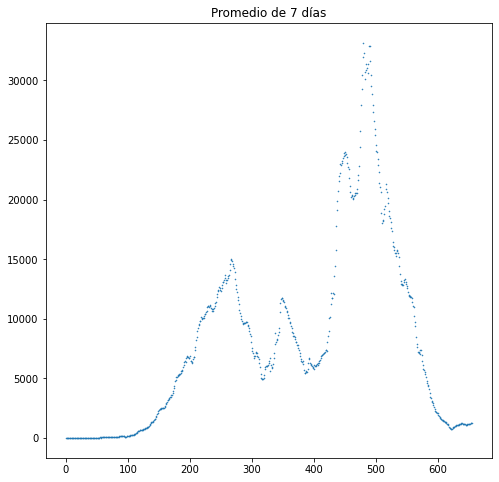

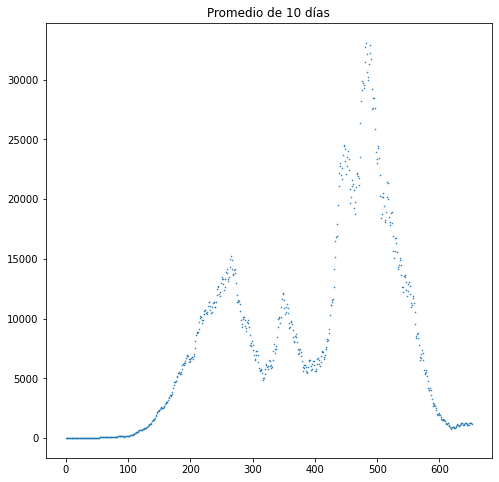

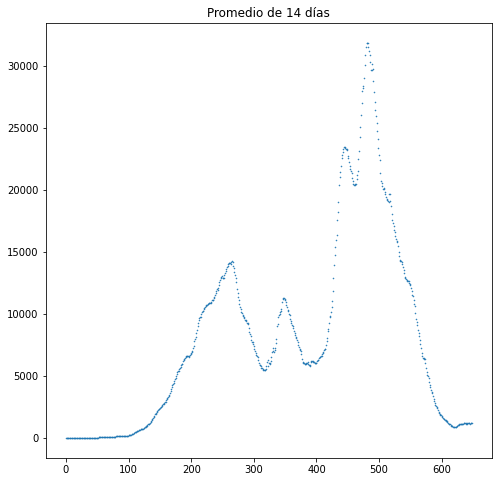

In [ ]:
for k in [3,7,10,14]:
    w = promedio_ventana(diarios_ARG,k)
    fig = plt.figure(figsize=(8,8))
    plt.title("Promedio de %i días" % k)
    plt.scatter(range(len(w)), w, s = 0.3)

    

5. Finalmente, nos interesa ahora estudiar los datos correspondientes a las distintas olas. Para ello consideraremos los datos (de Argentina) suavizados por promedios de $7$ días (en los que deberían distinguirse claramente $4$ picos). Seleccionar $4$ mínimos y $4$ máximos locales.

    Como los datos aún contienen bastantes oscilaciones, la idea es hacer esto casi a mano: seleccionar tramos en donde se distinga a ojo un único máximo (o mínimo) y utilizar el comando np.argmax (o np.argmin) para detectar el índice preciso en el que se encuentra el máximo. Teniendo en cuenta que durante los primeros meses de pandemia mundial hubo muy pocos casos en Argentina, vamos a elegir como primer "mínimo" el día $100$. 
    
    Generar una lista con los mínimos y una lista con los máximos.
    
    Graficar conjuntamente: los datos suavizados, los mínimos y los máximos (este gráfico nos permite confirmar que nuestra selección de máximos y mínimos sea correcta). 

In [ ]:
pARGd = promedio_ventana(diarios_ARG, 7) #completar
pARGd_1 = pARGd[100:300]
pARGd_2 = pARGd[301:370]
pARGd_3 = pARGd[371:460]
pARGd_4 = pARGd[460:]
max_1 = np.argmax(pARGd_1) + 100
max_2 = np.argmax(pARGd_2) + 301
max_3 = np.argmax(pARGd_3) + 371
max_4 = np.argmax(pARGd_4) + 460
picos = [max_1, max_2, max_3, max_4]
valores_picos = [pARGd[max_1], pARGd[max_2], pARGd[max_3], pARGd[max_4]]
pozo_1 = 100
pozo_2 = np.argmin(pARGd[max_1:max_2]) + max_1
pozo_3 = np.argmin(pARGd[max_2:max_3]) + max_2
pozo_4 = np.argmin(pARGd[max_3:max_4]) + max_3

pozos = [pozo_1, pozo_2, pozo_3, pozo_4]
valores_pozos = [pARGd[pozo_1], pARGd[pozo_2], pARGd[pozo_3], pARGd[pozo_4]]

print(picos)
print(pozos)


[266, 348, 451, 480]
[100, 316, 385, 463]


In [ ]:
#Metodo alternativo para chequear
from scipy.signal import find_peaks
peaks, _ = find_peaks(pARGd, prominence=3500)
print(peaks)

[266 348 451 480]


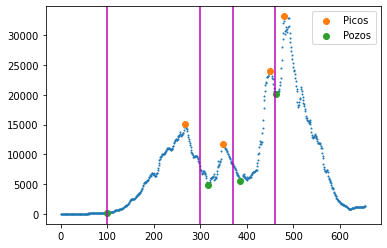

In [ ]:

plt.scatter(range(len(pARGd)), pARGd, s = 1)
plt.scatter(picos, valores_picos, label = 'Picos')
plt.scatter(pozos, valores_pozos, label = 'Pozos')
plt.axvline(x = 100, c ='m')
plt.axvline(x = 300, c ='m')
plt.axvline(x = 370, c ='m')
plt.axvline(x = 460, c ='m')
plt.legend()

5. Queremos saber, ahora si las distintas olas generaron un crecimiento exponencial de casos y, de ser así, con qué tasa de crecimiento. Seleccionaremos el tramo correspondiente a la primera ola en Argentina. Graficar los datos junto con un ajuste lineal y un ajuste por una función de la forma $f(x) = ae^{bx}$. 

    Tener en cuenta que nos interera ver los datos (suavizados) como puntos (scatter) y los ajustes como funciones, para lo cual conviene generar una malla más fina del intervalo correspondiente para graficar los ajustes.  
    
    ¿Qué ajuste parece más apropiado?

In [ ]:
ola_1 = pARGd[pozo_1:max_1]
dias_ola_1 = np.arange(pozo_1, max_1)
len(dias_ola_1)

166

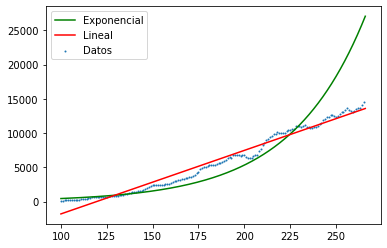

In [ ]:
#Primera ola - entiendo que se refiere a tomar desde el primer mínimo hasta el primer máximo

x = np.arange(pozo_1, max_1, 0.05)

#ajuste exponencial
ola_1_ln = np.log(ola_1)
p = np.polyfit(dias_ola_1,ola_1_ln,1)
b, a = p
ajuste = np.exp(a)*np.exp(b*x)

#ajuste lineal

q = np.polyfit(dias_ola_1, ola_1, 1)


plt.scatter(dias_ola_1, ola_1, s = 1, label = 'Datos')
plt.plot(x, ajuste, 'g', label = 'Exponencial')
plt.plot(x,np.polyval(q,x),'r', label = 'Lineal')
plt.legend()

#Completar

Consideremos ahora el tercer tramo de crecimiento acelerado (lo que podríamos llamar la tercera ola, o el primer período de la tercera ola). En este caso, se observa fácilmente que el ajuste lineal no tiene sentido. Haremos por lo tanto otros ajustes: 

El primero, con una función de la forma $f(x) = ae^{bx}$. 

El segundo, con una función de la forma $g(x) = ae^{bx^2}$. 

Tener en cuenta que para el segundo ajuste NO se puede usar np.polyfit (¿por qué?). Es necesario construir una matriz apropiada y resolver el sistema correspondiente usando $QR$. 

Nuevamente, ¿Qué ajuste resulta más apropiado?

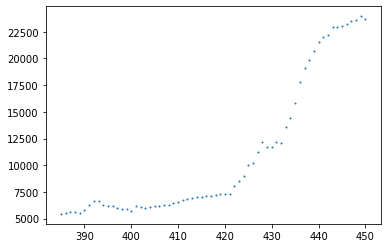

In [ ]:
ola_3 = pARGd[pozo_3:max_3]
dias_ola_3 = np.arange(pozo_3, max_3)
plt.scatter(dias_ola_3, ola_3, s = 1)

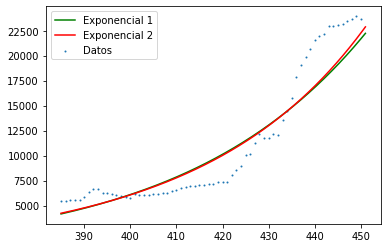

In [ ]:
#Tercera ola
#Completar primer ajuste:

x = np.arange(pozo_3, max_3, 0.05)

ola_3_ln = np.log(ola_3)
l = np.polyfit(dias_ola_3,ola_3_ln,1)
m, c = l
ajuste_2 = np.exp(c)*np.exp(m*x)

#Segundo ajuste:

A = np.ones((len(ola_3), 2))   #Crear la matriz que tiene como primer columna lo que corresponda a x^2, y como segunda columna, unos 
for n in range (0, len(ola_3)):        #que es la matriz de Vandermonde del problema, luego de hacer el cambio de variables adecuado. 
  A[n, 0] = (pozo_3+n)**2
q,r = np.linalg.qr(A)
b = np.dot((np.transpose(q)), ola_3_ln)
p = np.linalg.solve(r, b) #Resolver el sistema correspondiente para obtener el ajuste de los datos transformados.
# Recuperar la función exponencial

def g(x):
  return np.exp(p[1])* np.exp(p[0] * (x**2))


plt.scatter(dias_ola_3, ola_3, s = 1, label = 'Datos')
plt.plot(x, ajuste_2, 'g' ,label ='Exponencial 1')
plt.plot(x, g(x), 'r' ,label = 'Exponencial 2')
plt.legend()

#Graficar

6. Por último, estudiemos el caso australiano. Trabajaremos con los datos crudos, sin suavizar. Seleccionar (a mano) el tramo correspondiente a la última ola (sólo el período de crecimiento) y hacer un ajuste exponencial. 

    Hay un pequeño tramo en el que efectivamente puede considerarse que el crecimiento es exponencial. Ajustar la selección de datos hasta lograr un buen ajuste. 

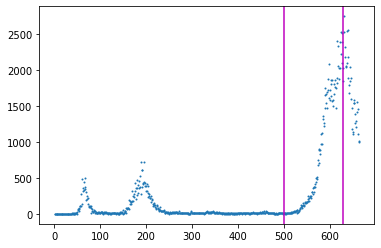

In [ ]:
dia_max = np.argmax(diarios_AUS)
plt.scatter(dias_diario, diarios_AUS, s = 1)
plt.axvline(x = dia_max, color ='m')
plt.axvline(x = 500, color ='m')

In [ ]:
AUS_ola = diarios_AUS[500:600]
AUS_dias_ola = dias_diario[500:600]


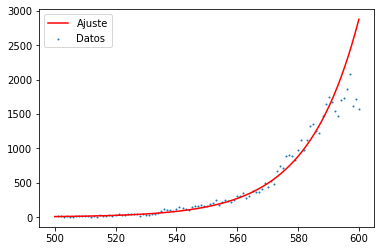

In [ ]:
#Completar ajuste y gráficos. 

x = np.arange(500, 600, 0.05)

AUS_ola_ln = np.log(AUS_ola)
z = np.polyfit(AUS_dias_ola, AUS_ola_ln, 1)
h, j = z
ajuste_AUS = np.exp(j)*np.exp(h*x)

plt.scatter(AUS_dias_ola, AUS_ola, s = 1, label = 'Datos')
plt.plot(x, ajuste_AUS, 'r' ,label ='Ajuste')
plt.legend()

